In [146]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from pipeline.label_pipeline import FairnessLabelPipeline
from fairness_label.fairness_label import *
from visualization.visualize_plots import *
%matplotlib inline

In [147]:
# We still chooose race and sex as our sensitive attributes
data_file = 'data/compas_AIF_new.csv'
sensi_atts = ['race','sex']
y_col = 'is_recid'
na_symbol = "?"
y_posi = ['pos']
sensi_pro_valus = {"sex": ["Female"], "race": ["African-American"]}

In [148]:
base_steps = [("BalanceTargetSplitter", [0.7, 0.3], y_col), # splitter
               None,  # sampler
               ("DropNAImputer", "?"), # imputer
               None, # scaler
               None, # categorizer
               None,  # encoder
               None, # sensitive att and target encoder
               None,  # fair-preprocessor
               ("OPT_LogisticRegression", y_col), # model
               None  # fair-post-postprocessor
               ]

cur_pip = FairnessLabelPipeline(data_file, y_col, y_posi, sensitive_atts=sensi_atts, protected_values=sensi_pro_valus, na_mark=na_symbol)
before_test, after_test = cur_pip.run_pipeline(base_steps, return_test=True, output_interdata=True)

BalanceTargetSplitter(input_df, [0.7, 0.3], 'is_recid')
!!!!!!! train (5049, 7) !!!!!!!
Current train data after BalanceTargetSplitter 
 Stored in  /Users/honggong/Documents/DS-3001/deml-project-4/data/inter_data/co_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/compas_AIF_new__after__BalanceTargetSplitter.csv

!!!!!!! test (2165, 7) !!!!!!!
Current test data after BalanceTargetSplitter 
 Stored in  /Users/honggong/Documents/DS-3001/deml-project-4/data/inter_data/co_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/test/compas_AIF_new__after__BalanceTargetSplitter.csv

Done Splitter

DropNAImputer(input_df, '?')
!!!!!!! train (5049, 7) !!!!!!!
Current train data after BalanceTargetSplitte DropNAImpute 
 Stored in  /Users/honggong/Documents/DS-3001/deml-project-4/data/inter_data/co_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/compas_AIF_new__after__BalanceTargetSplitte__DropNAImpute.csv

!!!!!!! test (2165, 7) !!!!!!!
Current test data afte

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    9.0s finished


!!!!!!! train (5049, 8) !!!!!!!
Current train data after BalanceTargetSplitte DropNAImpute OPT_LogisticRegression 
 Stored in  /Users/honggong/Documents/DS-3001/deml-project-4/data/inter_data/co_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/train/compas_AIF_new__after__BalanceTargetSplitte__DropNAImpute__OPT_LogisticRegression.csv

!!!!!!! test (2165, 8) !!!!!!!
Current test data after BalanceTargetSplitte DropNAImpute OPT_LogisticRegression 
 Stored in  /Users/honggong/Documents/DS-3001/deml-project-4/data/inter_data/co_BalanceTargetSplitter_DropNAImputer_OPT_LogisticRegression/test/compas_AIF_new__after__BalanceTargetSplitte__DropNAImpute__OPT_LogisticRegression.csv

Done model



### GENERATING STATIC LABELS

In [149]:
sl_race = get_static_label(after_test, [sensi_atts[0]], y_col)
sl_race

{'African-American': {'neg': 0.598, 'pos': 0.443},
 'Native American&more': {'neg': 0.402, 'pos': 0.557}}

In [150]:
# STATIC LABELS FOR RACE AND SEX 
sl_race_sex = get_static_label(after_test, sensi_atts, y_col)
sl_race_sex

{('African-American', 'Female'): {'neg': 0.135, 'pos': 0.235},
 ('African-American', 'Male'): {'neg': 0.865, 'pos': 0.765},
 ('Native American&more', 'Female'): {'neg': 0.174, 'pos': 0.237},
 ('Native American&more', 'Male'): {'neg': 0.826, 'pos': 0.763}}

### STATIC LABEL VISUALIZATION 

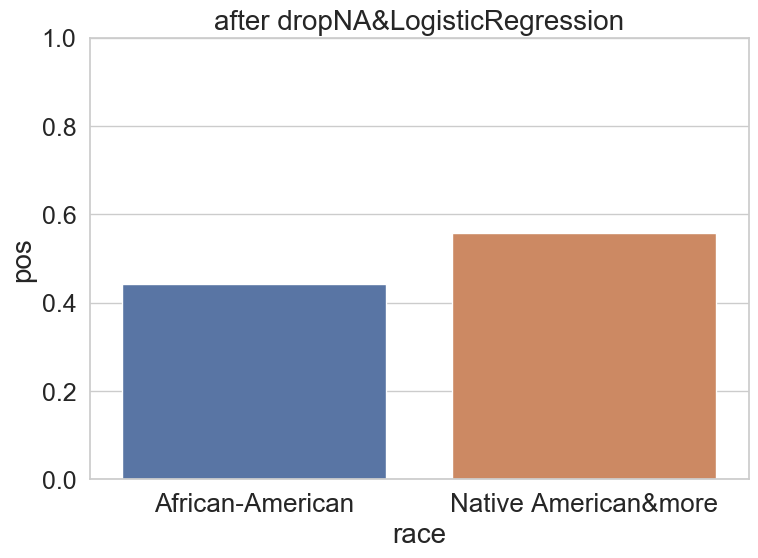

In [154]:

from visualization.visualize_plots import * 
%matplotlib inline

draw_bar_plot(sl_race, y_posi[0], [sensi_atts[0]], "dropNA&LogisticRegression")

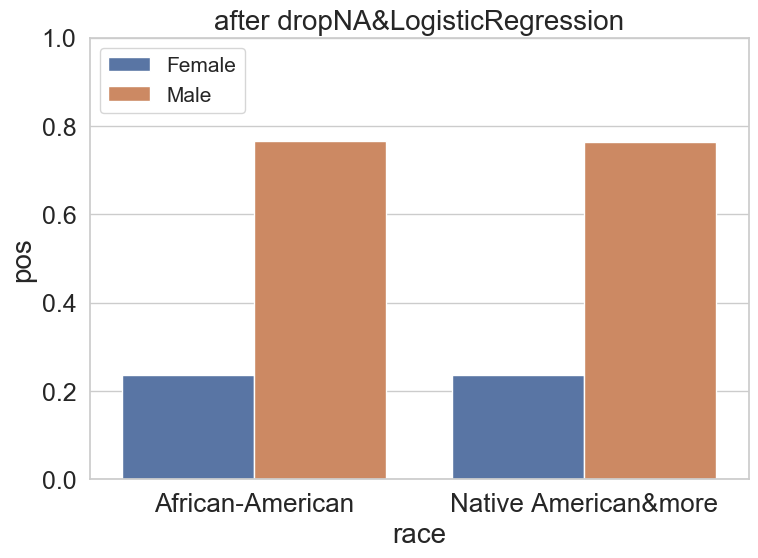

In [155]:
draw_bar_plot(sl_race_sex, y_posi[0], sensi_atts, "dropNA&LogisticRegression")

### Performance label for race 

In [156]:
pl_race = get_performance_label(after_test, [sensi_atts[0]], y_col, y_posi[0])
pl_race

{'African-American': {'PR': 0.556,
  'TPR': 0.966,
  'TNR': 0.08,
  'FPR': 0.92,
  'FNR': 0.034},
 'Native American&more': {'PR': 0.401,
  'TPR': 0.928,
  'TNR': 0.154,
  'FPR': 0.846,
  'FNR': 0.072}}

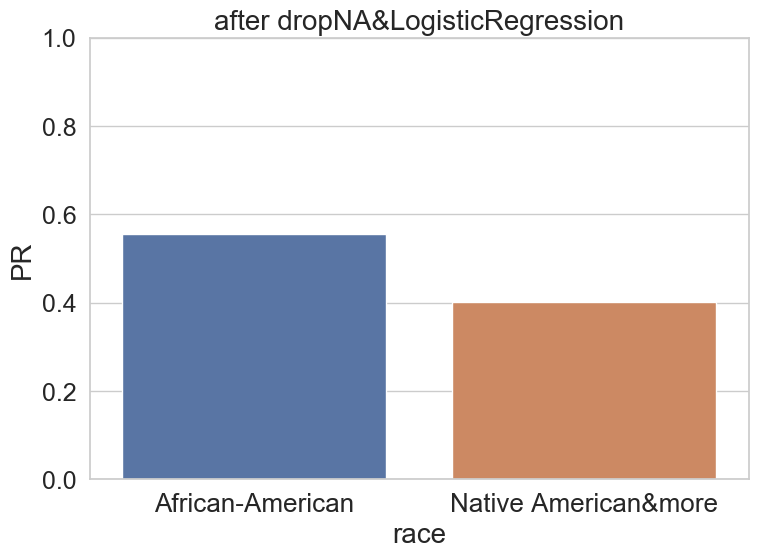

In [157]:
draw_bar_plot(pl_race, "PR", [sensi_atts[0]], "dropNA&LogisticRegression")

### Performance label for race  and sex

In [158]:
pl_race_sex = get_performance_label(after_test, sensi_atts, y_col, y_posi[0])
pl_race_sex

{('African-American', 'Female'): {'PR': 0.418,
  'TPR': 0.952,
  'TNR': 0.068,
  'FPR': 0.932,
  'FNR': 0.048},
 ('African-American', 'Male'): {'PR': 0.586,
  'TPR': 0.968,
  'TNR': 0.084,
  'FPR': 0.916,
  'FNR': 0.032},
 ('Native American&more', 'Female'): {'PR': 0.33,
  'TPR': 0.89,
  'TNR': 0.196,
  'FPR': 0.804,
  'FNR': 0.11},
 ('Native American&more', 'Male'): {'PR': 0.42,
  'TPR': 0.936,
  'TNR': 0.14,
  'FPR': 0.86,
  'FNR': 0.064}}

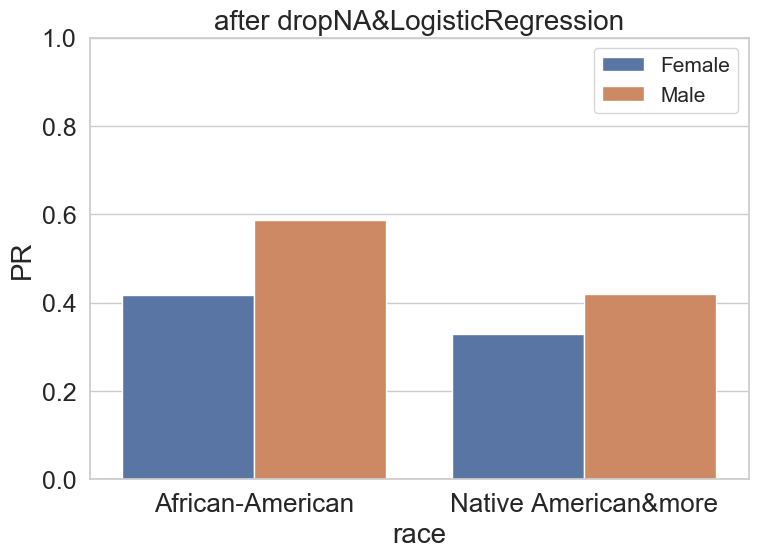

In [159]:
draw_bar_plot(pl_race_sex, "PR", sensi_atts, "dropNA&LogisticRegression", True)